<h1 style="text-align:center;font-size:36px;font-weight:bold;">How to plot and understand turbulence using the brightwind library</h1>

In [1]:
import datetime
print('Last updated: {}'.format(datetime.date.today().strftime('%d %B, %Y')))

Last updated: 15 October, 2024


<hr class="gray-line">
<font size="6">Outline:</font>

This guide will demonstrate how to get some useful turbulence intensity statistics from a sample dataset using the following steps:

<span style="color:white;">•</span>  Import the brightwind library and some sample data

<span style="color:white;">•</span>  Clean out some bad data and replot the turbulence intensity

<span style="color:white;">•</span>  Plot the turbulence intensity by windspeed and get access to the underlying data

<span style="color:white;">•</span>  Calculate a 12x24 matrix of turbulence intensity

<hr class="gray-line">
<font size="6">Load some data</font>

In [4]:
import brightwind as bw

In [5]:
# specify file location of existing sample dataset
filepath = r'E:\Programs\brightwind\brightwind\demo_datasets\demo_data.csv'
# load data into a dataframe
data = bw.load_csv(filepath)
# show first few rows of dataframe
data.head(5)

,Spd80mN,Spd80mS,Spd60mN,Spd60mS,Spd40mN,Spd40mS,Spd80mNStd,Spd80mSStd,Spd60mNStd,Spd60mSStd,...,Dir78mSStd,Dir58mS,Dir58mSStd,Dir38mS,Dir38mSStd,T2m,RH2m,P2m,PrcpTot,BattMin
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-09 15:30:00,8.370,7.911,8.160,7.849,7.857,7.626,1.240,1.075,1.060,0.947,...,6.100,110.1,6.009,112.2,5.724,0.711,100.0,935.0,0.0,12.94
2016-01-09 15:40:00,8.250,7.961,8.100,7.884,7.952,7.840,0.897,0.875,0.900,0.855,...,5.114,110.9,4.702,109.8,5.628,0.630,100.0,935.0,0.0,12.95
2016-01-09 17:00:00,7.652,7.545,7.671,7.551,7.531,7.457,0.756,0.703,0.797,0.749,...,4.172,113.1,3.447,111.8,4.016,1.126,100.0,934.0,0.0,12.75
2016-01-09 17:10:00,7.382,7.325,6.818,6.689,6.252,6.174,0.844,0.810,0.897,0.875,...,4.680,118.8,5.107,115.6,5.189,0.954,100.0,934.0,0.0,12.71
2016-01-09 17:20:00,7.977,7.791,8.110,7.915,8.140,7.974,0.556,0.528,0.562,0.524,...,3.123,115.9,2.960,113.6,3.540,0.863,100.0,934.0,0.0,12.69


<hr class="gray-line">
<font size="6">Plot the turbulence intensity by direction</font>

Plotting the turbulence intensity (TI) by direction is a good visual check to see if there are any particular sectors that are seeing more turbulence than others, or indeed to find any issues that were missed during cleaning. Here we plot the TI by sector using the average 10-min wind speed from the 80m anemometer, along with the standard deviation of the same instrument and the direction from the 78m wind vane.

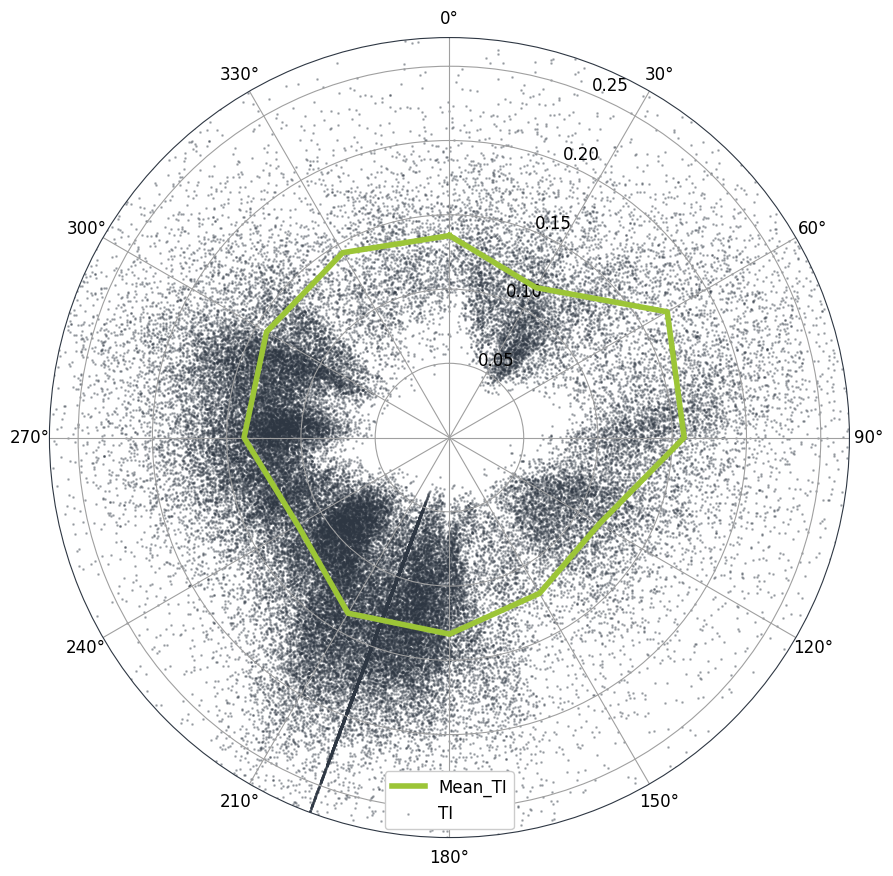

In [6]:
bw.TI.by_sector(data.Spd80mN, data.Spd80mNStd, data.Dir78mS)

We can see a thick black line running along at 200 degrees. This would indicate that the wind vane was stuck for a long period of time and was not cleaned out. Using the cleaning methodology as outlined in Tutorial 5, we clean the data and then replot the data.

In [7]:
# specify location of existing cleaning file
Cleaning_Filepath = r'E:\Programs\brightwind\brightwind\demo_datasets\demo_cleaning_file.csv'
#Apply cleaning file to Raw Data
data = bw.apply_cleaning(data,Cleaning_Filepath)

Cleaning applied. (Please remember to assign the cleaned returned DataFrame to a variable.)

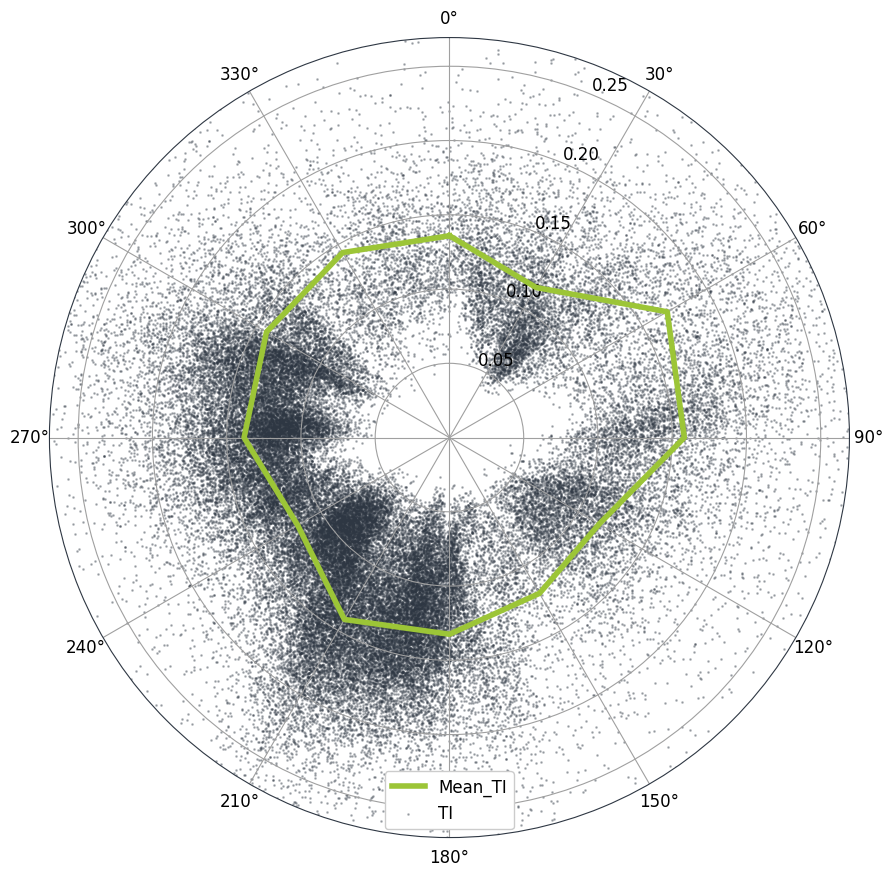

In [8]:
bw.TI.by_sector(data.Spd80mN,data.Spd80mNStd,data.Dir78mS)

Wollah! the bad data has been cleaned out.

<hr class="gray-line">
<font size="6">Calculate the turbulence intensity and plot by wind speed</font>

Understanding the turbulence intensity by wind speed is an important metric when evaluating the site conditions of a potential wind farm site. The brightwind library has a function to compute this and plot against the IEC Turbulence classes and the mean and representative turbulence intensity. The mean speed and the standard deviation of the same mean speed are passed into the following function.

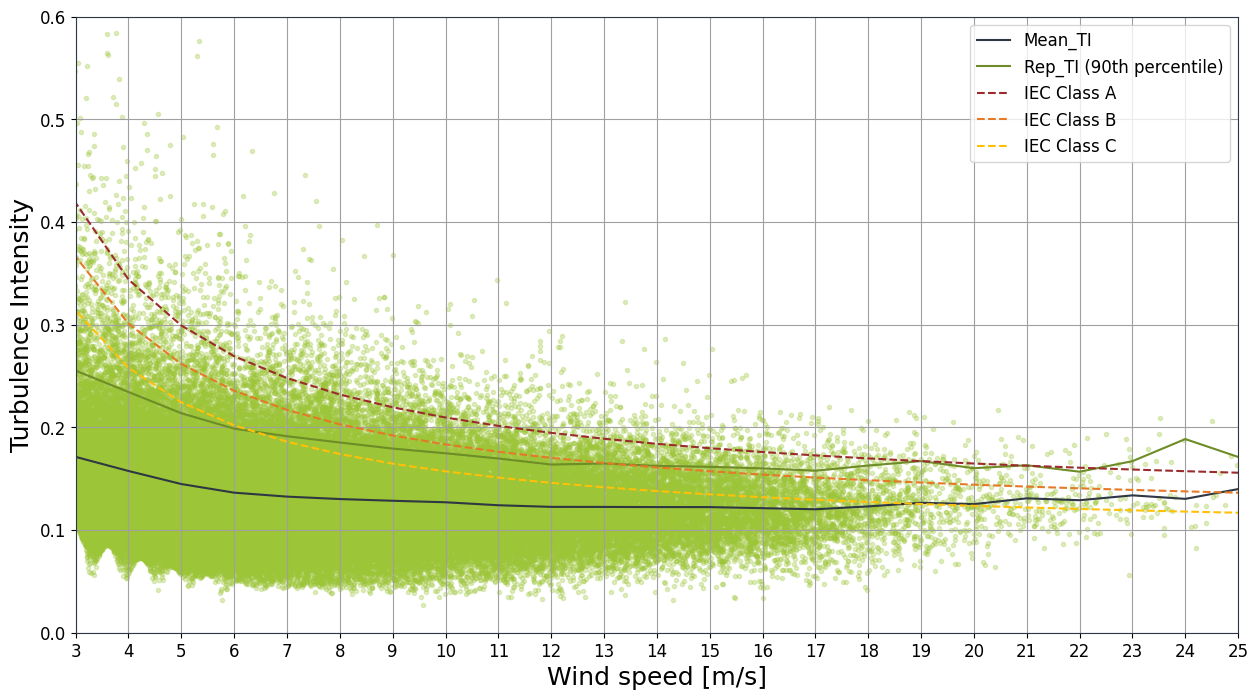

In [9]:
bw.TI.by_speed(data.Spd80mN,data.Spd80mNStd)

Returning the exact data from the plot can be useful especially when looking to extract inputs for turbulence intensity in Windfarmer or Openwind. To do this, we simply need to assign a plot and table to the function, and activiate the return_data flag within the function.

In [10]:
TI_plot, TI_Table = bw.TI.by_speed(data.Spd80mN, data.Spd80mNStd, return_data=True)
TI_Table

,Mean_TI,TI_Count,Rep_TI,TI_2Sigma,Char_TI
3,0.171282,3433,0.255325,0.066976,0.193608
4,0.157540,7963,0.234453,0.061226,0.172846
5,0.144822,8852,0.213788,0.054829,0.155787
6,0.136418,9519,0.198752,0.049315,0.144637
7,0.132567,9594,0.191380,0.045464,0.139062
8,0.130207,8915,0.185284,0.043492,0.135643
9,0.128533,7631,0.179356,0.040206,0.133000
10,0.127061,6383,0.174785,0.037214,0.130782
11,0.124160,5240,0.169697,0.035074,0.127349
12,0.122585,4248,0.163811,0.033470,0.125374


<hr class="gray-line">
<font size="6">Getting the 12x24 matrix of turbulence</font>

The 12x24 matrix of turbulence is useful for seeing how the TI varies throughout the year. It shows the average turbulence for each hour of the day and for each month of the year.

In [11]:
bw.TI.twelve_by_24(data.Spd80mN, data.Spd80mNStd)

Month,1,2,3,4,5,6,7,8,9,10,11,12
Hour,,,,,,,,,,,,
0,0.123298,0.127858,0.132076,0.139142,0.139856,0.118668,0.142162,0.134350,0.127003,0.130014,0.120780,0.123587
1,0.123201,0.130815,0.136646,0.136444,0.149340,0.122524,0.130824,0.130241,0.131105,0.128241,0.116534,0.129366
2,0.127529,0.129643,0.136712,0.133500,0.139576,0.125087,0.128889,0.119857,0.123331,0.131344,0.119824,0.128259
3,0.126838,0.130400,0.136464,0.138197,0.141988,0.126567,0.127587,0.131554,0.126498,0.129808,0.127028,0.124243
4,0.135728,0.144298,0.144407,0.134473,0.141474,0.124459,0.125384,0.132680,0.126264,0.130177,0.117818,0.128227
5,0.130230,0.135277,0.139639,0.128773,0.128980,0.119023,0.127826,0.136850,0.120663,0.128160,0.115044,0.131810
6,0.126320,0.141140,0.141834,0.129834,0.135211,0.127730,0.135631,0.130856,0.128388,0.134495,0.119158,0.132965
7,0.131307,0.142126,0.137936,0.138492,0.137093,0.130571,0.140000,0.135732,0.132314,0.121811,0.126774,0.136691
8,0.124468,0.142668,0.141129,0.141683,0.149440,0.136717,0.143967,0.145758,0.136104,0.124737,0.123307,0.127271


In [ ]:
<hr class="gray-line">
<font size="6">Import brightwind and data</font>